___
# Análise Exploratória:  Medidas Resumo e Histograma
___

## Aula 04 - Atividade

<div id="indice"></div>

## Índice

- [Empresa de TV](#empresa-de-tv)
- [Medidas resumo](#medidas-resumo)
    - [Revisão exercício 7 da Aula 02](#ex7aula02)
    - [Revisão exercício 8 da Aula 02](#ex8aula02)    
    - [Exercício 1](#ex1) 
- [Histograma](#histograma)
    - [Exercício 2](#ex2) 
    - [Exercício 3](#ex3) 
___

<div id="empresa-de-tv"></div>

## Empresa de TV

Uma empresa de TV via satélite criou recentemente dois tipos de planos de canais (A e B).

A empresa tem como objetivo estudar o perfil dos clientes que aderiram ao plano para enviar malas diretas aos potenciais clientes de cada tipo de plano.

A base de dados apresenta algumas variáveis para uma amostra de 82 clientes selecionados aleatoriamente dentre aqueles que aderiram aos planos. As variáveis têm os seguintes significados:

* CLIENTE: identificador do cliente.
* PLANO: apresenta o plano adquirido pelo cliente – (1=A ou 2=B). 
* EC: apresenta estado civil do cliente no momento da adesão ao  plano – (1=Casado, 2=Solteiro e 3=Outros).
* SATISFACAO: grau de satisfação do cliente pelo plano – 
	(5=Muito satisfeito, 4=Satisfeito, 3=Indiferente, 2=Insatisfeito e 1=Muito insatisfeito).
* RENDA: renda pessoal do cliente, em milhares de reais.

O arquivo `EmpresaTV Cod.xlsx` contém as variáveis descritas acima.


In [1]:
%matplotlib inline
import pandas as pd
import matplotlib.pyplot as plt
import os
from numpy import arange
import numpy as np

# Para ter melhor print
from IPython.display import display

In [2]:
print('Esperamos trabalhar no diretório')
print(os.getcwd())

Esperamos trabalhar no diretório
C:\Users\Fernando\Documents\Insper\2 semestre\Ciência dos Dados\CD20-2\aula04


In [3]:
dados = pd.read_excel('EmpresaTV Cod.xlsx')

# Definições necessárias vistas na Aula 02
dados.PLANO = dados.PLANO.astype('category')
dados.EC = dados.EC.astype('category')
dados.SATISFACAO = dados.SATISFACAO.astype('category')
dados.RENDA = dados.RENDA.astype('float')

dados.PLANO.cat.categories = (['A', 'B'])
dados.EC.cat.categories = (['Casado', 'Solteiro', 'Outros'])
dados.SATISFACAO.cat.categories = (['Muito Insatisfeito', 'Insatisfeito', 
                                    'Indiferente', 'Satisfeito', 'Muito Satisfeito'])


___
<div id="medidas-resumo"></div>

## Medidas resumo

Para compreender as informações contidas em variáveis quantitativas, podemos recorrer ao cálculo de algumas medidas resumo como  por exemplo:
  * média: [pd.mean()](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.mean.html)
  * percentis: [pd.quantile()](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.quantile.html)
  * desvio padrão: [pd.std()](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.std.html)
  * variância: [pd.var()](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.var.html)
  

<div id="ex7aula02"></div>

No **Exercicio 7** do notebook da **Aula02_Atividade**, foi pedido para segmentar a base de dados por plano e criar uma variável renda para cada plano.

A seguir, temos as respostas para esse exercício:


In [4]:
dados_a = dados.loc[dados['PLANO'] == 'A',:]
dados_b = dados.loc[dados['PLANO'] == 'B',:]

renda_a = dados.loc[dados['PLANO'] == 'A','RENDA']
renda_b = dados.loc[dados['PLANO'] == 'B','RENDA']
renda_a = dados_a['RENDA']
renda_b = dados_b['RENDA']

<div id="ex8aula02"></div>

Já no **Exercicio 8** do notebook da **Aula02_Atividade**, foi pedido para imprimir tamamnho amostral, média, mínimo, primeiro quartil (percentil de ordem 25%), segundo quartil (mediana), terceiro quartil (percentil de ordem 75%), máximo, desvio padrão e variância das rendas do clientes para cada plano A e B, separadamente.

A seguir, temos as respostas para esse exercício:


In [5]:
for title, var_quanti in (('Plano A', renda_a), ('Plano B', renda_b)):
    print('-' * 5 * len(title))
    print(title)
    print('-' * 5 * len(title))
    print(f'contagem               = {len(var_quanti)}')
    print(f'média                  = {var_quanti.mean():.3f}')
    print(f'mínimo                 = {var_quanti.min():.3f}')
    print(f'primeiro quartil (Q1)  = {var_quanti.quantile(q=0.25):.3f}')
    print(f'mediana          (Q2)  = {var_quanti.median():.3f}')
    print(f'terceiro quartil (Q3)  = {var_quanti.quantile(q=0.75):.3f}')
    print(f'máximo                 = {var_quanti.max():.3f}')
    print(f'variância amostral     = {var_quanti.var():.3f}')
    print(f'desvio padrão amostral = {var_quanti.std():.3f}')
    print()

-----------------------------------
Plano A
-----------------------------------
contagem               = 46
média                  = 10.422
mínimo                 = 0.700
primeiro quartil (Q1)  = 7.475
mediana          (Q2)  = 10.350
terceiro quartil (Q3)  = 13.200
máximo                 = 21.400
variância amostral     = 19.941
desvio padrão amostral = 4.466

-----------------------------------
Plano B
-----------------------------------
contagem               = 36
média                  = 5.689
mínimo                 = 0.600
primeiro quartil (Q1)  = 4.150
mediana          (Q2)  = 5.150
terceiro quartil (Q3)  = 6.375
máximo                 = 19.200
variância amostral     = 10.847
desvio padrão amostral = 3.293



Outra maneira para obter as medidas resumo da variável `RENDA` segmentadas por `PLANO` é fazendo uso dos comandos `groupby()` e `describe()`.

Vamos lembrar como fazê-lo?

In [11]:
dados.groupby(["PLANO"]).describe()

CLIENTE                                                  RENDA  \
        count  mean        std   min    25%   50%    75%   max count   
PLANO                                                                  
A        46.0  23.5  13.422618   1.0  12.25  23.5  34.75  46.0  46.0   
B        36.0  64.5  10.535654  47.0  55.75  64.5  73.25  82.0  36.0   

                                                             
            mean       std  min    25%    50%     75%   max  
PLANO                                                        
A      10.421739  4.465568  0.7  7.475  10.35  13.200  21.4  
B       5.688889  3.293437  0.6  4.150   5.15   6.375  19.2

<div id="ex1"></div>

### EXERCÍCIO 1

Observe os todos esses resultados e tire conclusões sobre a renda dos clientes (em mil reais) em cada plano. 
Destaque sua interpretação também para dentro de cada plano e não só entre planos.

Pode-se afirmar que o Plano A é voltado para pessoas de alta renda, já o Plano B é voltado para de baixa renda. Além disso, é possível dizer que a diferença entre os salários do Plano A é maior do que o Plano B.

___
<div id="histograma"></div>

## Histograma

O histograma é um gráfico adequado para representar variáveis quantitativas obrigatoriamente. 

No eixo x, tem-se a representação da grandeza da variável que está estudada.

No eixo y, o *default* considera a frequência absoluta (contagem). Entretanto, há dois importantes motivos que nos animam utilizar a medida densidade alterando o argumento *density* para *True*, ou seja, `density=True`. Veja os motivos:
  * Considerar a densidade no eixo y, permite considerar faixas com amplitudes diferentes sem distorção de interpretação.
  * Considerar a densidade no eixo y, garante que a área do histograma seja igual a $1$ permitindo colocar curvas probabilísticas cuja área total também é $1$.

Para construí-lo considerando a biblioteca `matplotlib`, consulte [aqui](https://matplotlib.org/3.3.1/api/_as_gen/matplotlib.pyplot.hist.html).

<div id="ex2"></div>

### EXERCÍCIO 2

A seguir, veja algumas possibilidades de histograma com a variável `RENDA` considerando todos os clientes.

Analise os quatro histogramas abaixo. Um deles está seguramente errado. Identifique-o e descreva o motivo.

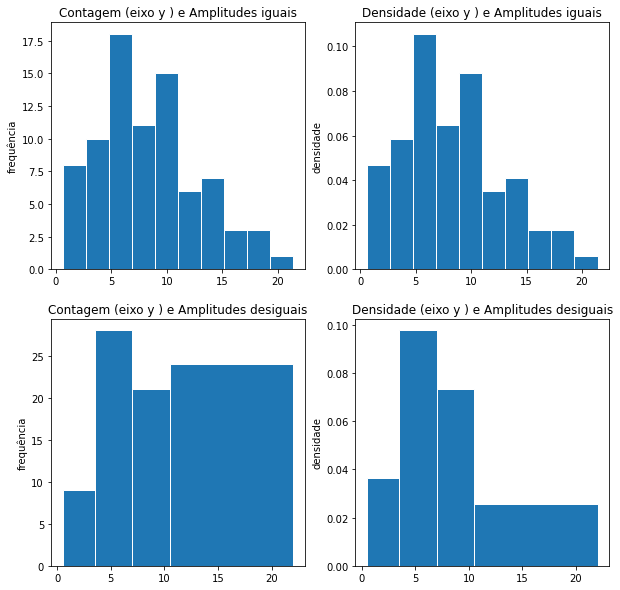

In [12]:
plt.figure(figsize=(10, 10))

plt.subplot(221)
plt.hist(dados.RENDA, edgecolor='white')
plt.title('Contagem (eixo y ) e Amplitudes iguais')
plt.ylabel('frequência')

plt.subplot(222)
plt.hist(dados.RENDA, edgecolor='white', density=True)
plt.title('Densidade (eixo y ) e Amplitudes iguais')
plt.ylabel('densidade')

plt.subplot(223)
plt.hist(dados.RENDA, bins=(0.5,3.5,7,10.5,22), edgecolor='white')
plt.title('Contagem (eixo y ) e Amplitudes desiguais')
plt.ylabel('frequência')

plt.subplot(224)
plt.hist(dados.RENDA, bins=(0.5,3.5,7,10.5,22), edgecolor='white', density=True)
plt.title('Densidade (eixo y ) e Amplitudes desiguais')
plt.ylabel('densidade')

plt.show()

In [ ]:
# Coloque sua interpretação aqui

<div id="ex3"></div>

### EXERCÍCIO 3

Faça histograma para renda satisfazendo todas as restrições abaixo:
  * segmentar por plano
  * usar densidade no eixo y
  * faixas com amplitudes iguais de $3.5$ 
  * iniciar faixa em $0.5$
  * use o comando `arange` da biblioteca `numpy` para construir essas faixas. Busque a sintaxe desse comando no seu navegador
  * use plt.subplot() com 1 linha e 2 colunas

In [19]:
from numpy import arange

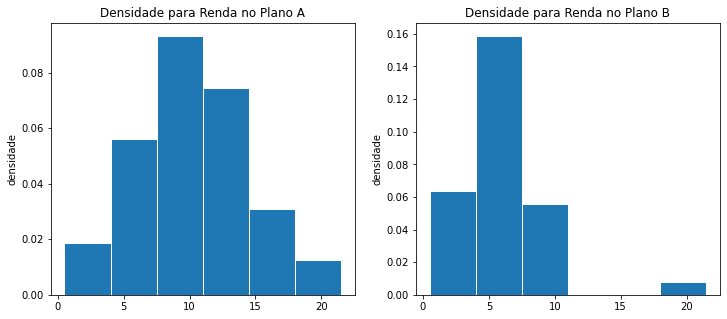

In [26]:
plt.figure(figsize=(12, 5))
plt.subplot(121)
plt.hist(renda_a, edgecolor='white', density=True, bins=np.arange(0.5, 22, 3.5))
plt.title('Densidade para Renda no Plano A')
plt.ylabel('densidade')

plt.subplot(122)
plt.hist(renda_b, edgecolor='white', density=True, bins=np.arange(0.5, 22, 3.5))
plt.title('Densidade para Renda no Plano B')
plt.ylabel('densidade')

plt.show()